# Proyecto de clasificación con uso de Framework
##
#### Importación de librerías

In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sb
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

#### Importación de Datos

In [2]:
df=pd.read_csv('spotify_songs.csv')

#### Exploración

In [3]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [4]:
df.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [5]:
print(f"Hay {df.duplicated().sum()} duplicados.")

Hay 0 duplicados.


In [6]:
df.dtypes

track_id                     object
track_name                   object
track_artist                 object
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
playlist_name                object
playlist_id                  object
playlist_genre               object
playlist_subgenre            object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
dtype: object

Se buscará hacer un modelo que realice la clasificación de canciones por género de la lista de reproducción en la que se encuentra. Se usarán únicamente valores numéricos para realizar la clasificación, por lo que el resto de las columnas serán eliminadas.

In [7]:
df=df.rename({'playlist_genre':'genre'},axis=1)
df2=df
df=df.drop(columns=['track_id','track_name','track_artist','playlist_subgenre','track_album_id','track_album_name','track_album_release_date',
'playlist_name','playlist_id'])
df.head()

,track_popularity,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,66,pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,67,pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,70,pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,60,pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,69,pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [8]:
y=df['genre']
x=df.drop(columns='genre')

In [9]:
x.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [10]:
df = pd.get_dummies(df,columns=['genre'])


In [11]:
df.corr()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,genre_edm,genre_latin,genre_pop,genre_r&b,genre_rap,genre_rock
track_popularity,1.000000,0.064748,-0.109112,-0.000650,0.057687,0.010637,0.006819,0.085159,-0.149872,-0.054584,0.033231,-0.005378,-0.143682,-0.145304,0.078588,0.094654,-0.022337,0.013612,-0.012629
danceability,0.064748,1.000000,-0.086073,0.011736,0.025335,-0.058647,0.181721,-0.024519,-0.008655,-0.123859,0.330523,-0.184084,-0.096879,0.000626,0.173830,-0.048109,0.047040,0.201596,-0.390075
energy,-0.109112,-0.086073,1.000000,0.010052,0.676625,-0.004800,-0.032150,-0.539745,0.033247,0.161223,0.151103,0.149951,0.012611,0.272658,0.023124,0.005977,-0.265001,-0.121978,0.079649
key,-0.000650,0.011736,0.010052,1.000000,0.000959,-0.174093,0.022607,0.004306,0.005968,0.002887,0.019914,-0.013370,0.015139,-0.002936,0.013088,-0.006912,0.003206,0.012302,-0.019301
loudness,0.057687,0.025335,0.676625,0.000959,1.000000,-0.019289,0.010339,-0.361638,-0.147824,0.077613,0.053384,0.093767,-0.115058,0.205345,0.065715,0.060715,-0.170628,-0.049746,-0.122593
mode,0.010637,-0.058647,-0.004800,-0.174093,-0.019289,1.000000,-0.063512,0.009415,-0.006741,-0.005549,0.002614,0.014329,0.015634,-0.043699,-0.003250,0.020332,-0.039754,-0.041169,0.114389
speechiness,0.006819,0.181721,-0.032150,0.022607,0.010339,-0.063512,1.000000,0.026092,-0.103424,0.055426,0.064659,0.044603,-0.089431,-0.095504,-0.018806,-0.146565,0.042730,0.411139,-0.205355
acousticness,0.085159,-0.024519,-0.539745,0.004306,-0.361638,0.009415,0.026092,1.000000,-0.006850,-0.077243,-0.016845,-0.112724,-0.081581,-0.202905,0.069927,-0.009280,0.171425,0.035954,-0.057837
instrumentalness,-0.149872,-0.008655,0.033247,0.005968,-0.147824,-0.006741,-0.103424,-0.006850,1.000000,-0.005507,-0.175402,0.023335,0.063235,0.283471,-0.077565,-0.049794,-0.110842,-0.017973,-0.041965
liveness,-0.054584,-0.123859,0.161223,0.002887,0.077613,-0.005549,0.055426,-0.077243,-0.005507,1.000000,-0.020560,0.021018,0.006138,0.066733,-0.026710,-0.038816,-0.043011,0.004412,0.035387


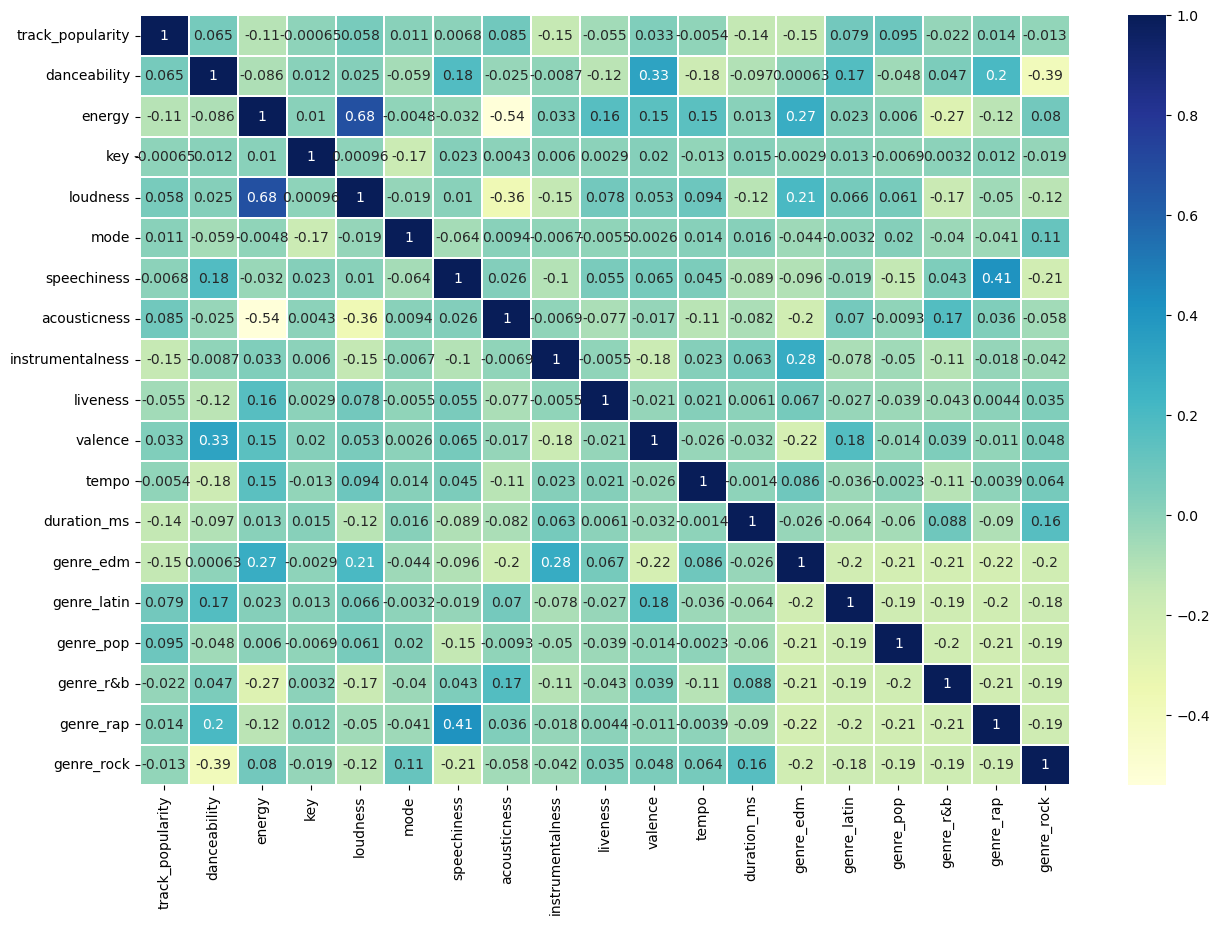

In [12]:
fig, ax = plt.subplots(figsize=(15, 10))
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu",linewidths=.1, annot=True) 

Las correlaciones más fuertes con el género EDM son energía, ruido e instrumentalidad. Con el género latino las correlaciones más fuertes son bailabilidad y positividad. Para el género pop hay un correlación negativa con la cantidad de palabras que se usan. Para el R&B hay una correlación negativa con la energía y ruido, y correlación positiva con la acusticidad. El rap tiene correlación positiva con la bailabilidad y las cantidad de palabras que se dicen. Finalmente el rock tiene una correlación negativa con bailabilidad y cantidad de palabras que se usan, y una correlación positiva con la duración de la canción. Se puede notar una correlación importante también entre ruido y energía de la canción, también se nota una correlación negativa entre la energía de la canción y la acusticidad.


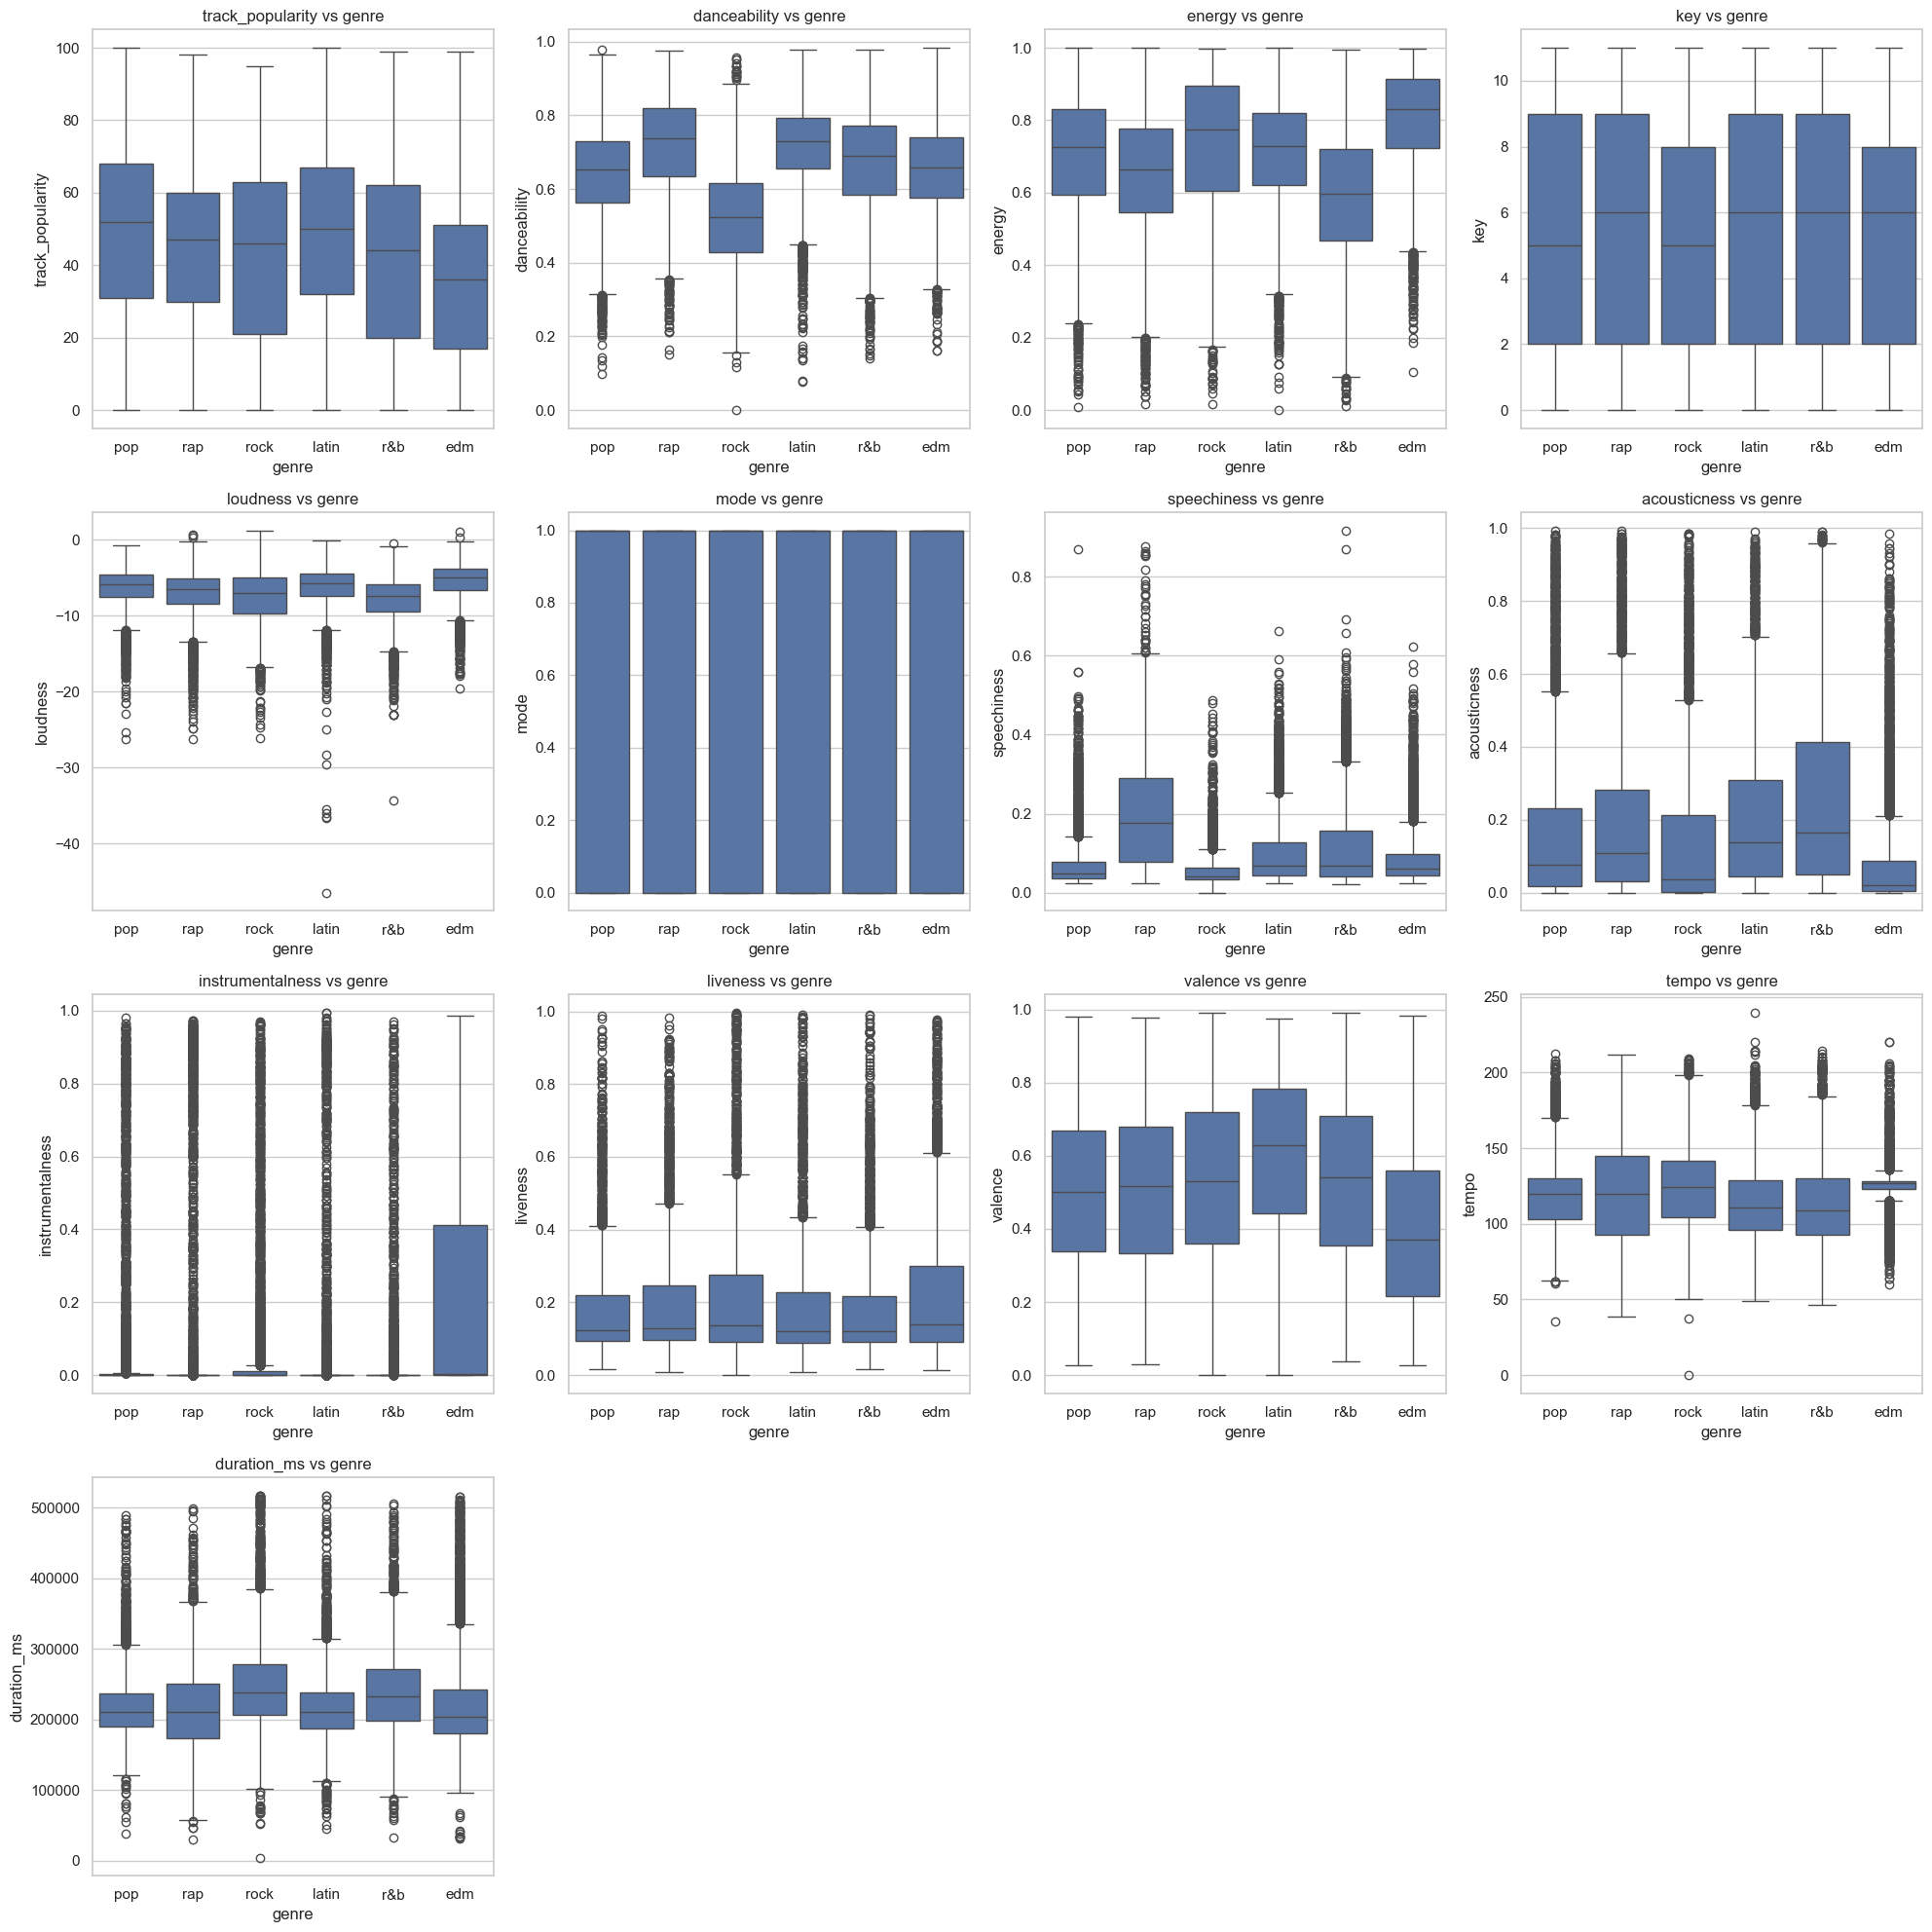

In [13]:
def plot_features_vs_labels_grid(X, Y, cols=4):
    sb.set(style="whitegrid")
    
    # Definir el número de filas y columnas en el grid
    num_features = len(X.columns)
    rows = math.ceil(num_features / cols)
    
    # Crear la figura y los ejes del grid
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))
    axes = axes.flatten()  # Convertir los ejes en un array plano para iterar fácilmente
    
    # Recorrer cada columna de X y graficarla
    for i, column in enumerate(X.columns):
        ax = axes[i]
        if pd.api.types.is_numeric_dtype(X[column]):
            # Si la columna es numérica, usar boxplot
            sb.boxplot(x=Y, y=X[column], ax=ax)
            ax.set_title(f"{column} vs {Y.name}")
        else:
            # Si la columna es categórica, usar countplot
            sb.countplot(x=Y, hue=X[column], ax=ax)
            ax.set_title(f"{column} vs {Y.name}")
        
        ax.set_xlabel(Y.name)
        ax.set_ylabel(column)
    
    # Eliminar las subplots vacías si hay más de las necesarias
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    # Ajustar el layout para que no se superpongan las gráficas
    plt.tight_layout()
    plt.show()

plot_features_vs_labels_grid(x, y, cols=4)

In [14]:
df2=x.copy()
df2['Label']=y
for column in x.columns:
    print(f"\nDescripción de: {column}")
    
    # Agrupar por Label y obtener el describe de esa columna
    feature_describe = df2.groupby('Label')[column].describe()
    
    # Mostrar el describe de esa columna agrupado por Label
    print(feature_describe)


Descripción de: track_popularity
        count       mean        std  min   25%   50%   75%    max
Label                                                            
edm    6043.0  34.833526  23.154235  0.0  17.0  36.0  51.0   99.0
latin  5155.0  47.026576  25.424557  0.0  32.0  50.0  67.0  100.0
pop    5507.0  47.744870  25.158331  0.0  31.0  52.0  68.0  100.0
r&b    5431.0  41.223532  25.894504  0.0  20.0  44.0  62.0   99.0
rap    5746.0  43.215454  23.302085  0.0  30.0  47.0  60.0   98.0
rock   4951.0  41.728338  24.825230  0.0  21.0  46.0  63.0   95.0

Descripción de: danceability
        count      mean       std     min    25%    50%      75%    max
Label                                                                  
edm    6043.0  0.655041  0.123558  0.1620  0.576  0.659  0.74100  0.983
latin  5155.0  0.713287  0.114974  0.0771  0.655  0.729  0.79250  0.979
pop    5507.0  0.639302  0.128221  0.0985  0.563  0.652  0.72900  0.979
r&b    5431.0  0.670179  0.138213  0.1400  0.584

##### Popularidad
Se puede notar que el promedio de popularidad de EDM es menor al resto, el género pop cuenta con el mayor promedio, seguido por el latino. Mientras que el género con menor popularidad máxima es el rock.

##### Bailabilidad
Los géneros con mayor bailabilidad promedio son rap y latin. Sin embargo, los que tienen mayor bailabilidad máxima son pop y latin. Mientras que el género que cuenta con una canción con menor bailabilidad es el rock.

##### Energía
En general las canciones con mayor energía promedio pertenecen al género EDM, estas cuentan con el mayor promedio y la menor desviación estándar. Y las que cuentan con menor promedio son R&B. Por otro lado la canción con mayor energía se encuentra en el género latin.

##### Clave
Se puede notar que en todos los casos las claves máximas y mínimas a las que se llegan son C y B. Se puede observar también que la mediana se encuentra entre F y F♯/G♭. 

##### Ruido
En cuanto al ruido percibido dentro del género se nota un promedio menor dentro del R&B, mientras que el EDM es el que tiene la mayor media. A su vez se observa que el género con las canciones más ruidosas con rock y EDM. También se tiene que mencionar que la canción menos ruidosa se encuentra en el género latin.

##### Escala
A través de los cuartiles y medias se puede notar que en términos generales las canciones están hechas en escala mayor. Especialmente se puede notar que el rock es el que tiene más canciones en escala mayor.

##### Locuacidad
El género con una mayor cantidad promedio de palabras en canciones es rap. Sin embargo, en este género no se encuentra la canción con más palabras, sino que esta se encuentra en el R&B. Por otro lado el género con menor cantidad promedio de palabras es el rock, el cual cuenta de misma forma con una canción sin palabras y su canción con más palabras es la que tiene menos palabras del resto canciones con más palabras de los otros géneros.

##### Acusticidad
Se puede notar que en general el puntaje de confianza de acusticidad es bajo, por lo que se puede inferir que el puntaje de acusticidad bajo implica poca confianza en cuanto a la acusticidad de las canciones de los géneros.

##### Instrumentalidad
En general se nota que todos los géneros tienen canciones con letras, puesto que el 3er cuartil de todas los géneros se encuentra por debajo de 0.5. Sin embargo, algo que se puede notar es que es normal para las canciones EDM ser instrumentales, mientras que para el resto de género esto representa valores atípicos.

##### En vivo
Se puede notar que las canciones no suelen ser grabadas en vivo. 

##### Valencia
Las canciones con el promedio más grande de valencia son las del género latin. Esto quiere decir que estás son las canciones que suenan más positivas, mientras que las que suenan más negativas son del género EDM. El género con la canción más positiva es Rock.

##### Tempo
Se puede notar que el género con las canciones con el mayor tempo promedio son del género EDM, seguido rock. También dentro de Rock se nota algo atípico y es un tempo de 0, este pertenece a una pista llamada Hi, How are you doing? de Dreams Come True. Dado que esto no es una canción, se eliminará. Además se debe mencionar que el género con la canción con mayor tempo es latin.

##### Duración en milisegundos
Se puede notar que la duración promedio de las canciones se encuentra entre 3 y 4 minutos. En promedio las canciones de Rock son las que duran más, mientras que las de rap son las que duran menos. El género con la canción más larga es el latino, seguido por el rock.

#### Selección de Features
Considerando los datos que se han logrado encontrar con respecto a las características consideradas en primera instancia. Se eliminará liveness

In [15]:
x=x.drop(columns='liveness')

#### Escalado de Datos

In [16]:
scaler=StandardScaler()
xe=scaler.fit_transform(x)

#### División en Train, test y validation

In [17]:
X_train, X_test, y_train, y_test = train_test_split(xe, y, test_size=0.2, random_state=42)#
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)#

Se dividió de la siguiente forma:
Train:70%
Test:20%
Validación:10%

### Entrenamiento de modelo

##### Random Forest

In [21]:
# Definir el modelo
rf = RandomForestClassifier(random_state=42)

# Definir el grid de hiperparámetros
param_grid = {
    'n_estimators': [100, 200,500],  
    'criterion': ["gini", "entropy"],
    'max_features': ['sqrt', 'log2'], 
    'max_depth': [10,25,50], 
    'min_samples_split': [2,5]
}

# Configurar el Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)  # cv reducido a 3

# Entrenar el modelo
grid_search.fit(X_train, y_train)

# Mejor combinación de hiperparámetros
print(f'Mejor combinación de hiperparámetros: {grid_search.best_params_}')


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Mejor combinación de hiperparámetros: {'criterion': 'gini', 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 500}


In [40]:
# Evaluar el modelo con los mejores hiperparámetros
best_rf = grid_search.best_estimator_
y_predtrainrf = best_rf.predict(X_train)
y_predvalrf = best_rf.predict(X_val)
y_predtestrf = best_rf.predict(X_test)


In [41]:
import numpy as np

# Diccionario para el encoding
label_mapping = {'rock': 0, 'latin': 1, 'pop': 2, 'edm': 3, 'r&b': 4, 'rap': 5}

# Aplicar el encoding
#Predicciones
y_predtrainrfen = np.array([label_mapping[genre] for genre in y_predtrainrf])
y_predvalrfen = np.array([label_mapping[genre] for genre in y_predvalrf])
y_predtestrfen = np.array([label_mapping[genre] for genre in y_predtestrf])

#Ys normales
y_trainrfen = np.array([label_mapping[genre] for genre in y_train])
y_valrfen= np.array([label_mapping[genre] for genre in y_val])
y_testen = np.array([label_mapping[genre] for genre in y_test])#y_test encoded

Entrenamiento

In [48]:
# Calcular métricas
accuracy = accuracy_score(y_trainrfen, y_predtrainrfen)
f1 = f1_score(y_trainrfen, y_predtrainrfen, average='weighted') 
conf_matrix = confusion_matrix(y_trainrfen, y_predtrainrfen)

# Imprimir resultados
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.9442172134714124
F1 Score: 0.9442381307126451
ROC-AUC: 0.5586208543319903
Confusion Matrix:
[[3406    3   23    0   12    1]
 [   1 3331  118   43   39   53]
 [  47   86 3590   80   75   27]
 [   2   51  142 3936   32   34]
 [  10   55  113   23 3553   78]
 [  16   56   15   19   28 3884]]


Validación

In [45]:
# Calcular métricas
accuracy = accuracy_score(y_valrfen, y_predvalrfen)
f1 = f1_score(y_valrfen, y_predvalrfen, average='weighted')
conf_matrix = confusion_matrix(y_valrfen, y_predvalrfen)

# Imprimir resultados
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.5441534713763703
F1 Score: 0.5375688904643463
ROC-AUC: 0.502818220777372
Confusion Matrix:
[[366   7  40  12  40   5]
 [ 27 203  76  53  86  92]
 [ 86  53 182  85  77  38]
 [ 10  41  89 423  23  42]
 [ 47  47  81  17 246 130]
 [ 22  45  25  33  68 367]]


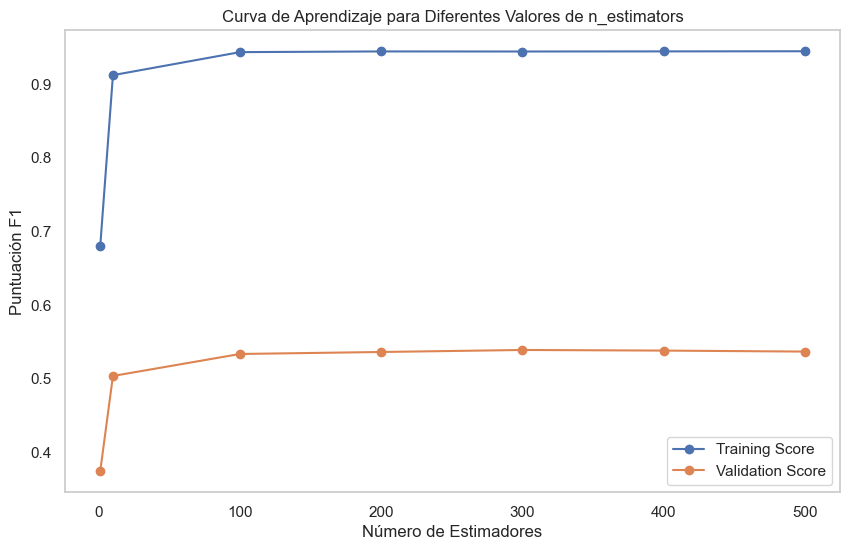

In [63]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, make_scorer

# Supongamos que 'params_range' es el rango de valores para n_estimators
params_range = [1,10,100, 200, 300,400,500]

# Almacenar puntuaciones
train_scores = []
val_scores = []

# Crear una función para calcular el puntaje
scoring = make_scorer(f1_score, average='macro')

# Dividir los datos en conjuntos de entrenamiento y validación si no se ha hecho antes
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)

for param in params_range:
    model = RandomForestClassifier(criterion='gini',max_features='sqrt',max_depth=50,min_samples_split=5,n_estimators=param, random_state=42)
    model.fit(X_train, y_train)
    train_scores.append(f1_score(y_train, model.predict(X_train), average='macro'))
    val_scores.append(f1_score(y_val, model.predict(X_val), average='macro'))

# Graficar las puntuaciones
plt.figure(figsize=(10, 6))
plt.plot(params_range, train_scores, label='Training Score', marker='o')
plt.plot(params_range, val_scores, label='Validation Score', marker='o')
plt.xlabel('Número de Estimadores')
plt.ylabel('Puntuación F1')
plt.legend()
plt.grid()
plt.title('Curva de Aprendizaje para Diferentes Valores de n_estimators')
plt.show()


Test

In [64]:
# Calcular métricas
accuracy = accuracy_score(y_testen, y_predtestrfen)
f1 = f1_score(y_testen, y_predtestrfen, average='weighted')  # Para múltiples clases
conf_matrix = confusion_matrix(y_testen, y_predtestrfen)

# Imprimir resultados
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.5643368356936196
F1 Score: 0.5583033752704543
Confusion Matrix:
[[789  24  88  35  86  14]
 [ 47 432 168 101 123 162]
 [162 132 364 182 168  73]
 [ 39  68 156 856  39  60]
 [ 85  71 120  34 498 223]
 [ 39  90  57  71 144 767]]


### Refinamiento

In [83]:
xe=x.drop(columns=['acousticness','key','mode','instrumentalness'])

In [84]:
scaler=StandardScaler()
xe=scaler.fit_transform(x)

In [85]:
y=df2['Label']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(xe, y, test_size=0.2, random_state=42)#
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)#

In [105]:
# Definir el modelo
rf = RandomForestClassifier(random_state=42)

# Definir el grid de hiperparámetros
param_grid = {
    'n_estimators': [500,600],  
    'criterion': ["gini","entropy"],
    'max_features': ['sqrt',"log"], 
    'max_depth': [10,50,75], 
    'min_samples_split': [2,5,10]
}

# Configurar el Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)  # cv reducido a 3

# Entrenar el modelo
grid_search.fit(X_train, y_train)

# Mejor combinación de hiperparámetros
print(f'Mejor combinación de hiperparámetros: {grid_search.best_params_}')

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Mejor combinación de hiperparámetros: {'criterion': 'gini', 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 500}


In [106]:
# Evaluar el modelo con los mejores hiperparámetros
best_rf = grid_search.best_estimator_
y_predtrainrf = best_rf.predict(X_train)
y_predvalrf = best_rf.predict(X_val)
y_predtestrf = best_rf.predict(X_test)


encoding

In [107]:
import numpy as np

# Diccionario para el encoding
label_mapping = {'rock': 0, 'latin': 1, 'pop': 2, 'edm': 3, 'r&b': 4, 'rap': 5}

# Aplicar el encoding
#Predicciones
y_predtrainrfen = np.array([label_mapping[genre] for genre in y_predtrainrf])
y_predvalrfen = np.array([label_mapping[genre] for genre in y_predvalrf])
y_predtestrfen = np.array([label_mapping[genre] for genre in y_predtestrf])

#Ys normales
y_trainrfen = np.array([label_mapping[genre] for genre in y_train])
y_valrfen= np.array([label_mapping[genre] for genre in y_val])
y_testen = np.array([label_mapping[genre] for genre in y_test])#y_test encoded

entrenamiento

In [108]:
# Calcular métricas
accuracy = accuracy_score(y_trainrfen, y_predtrainrfen)
f1 = f1_score(y_trainrfen, y_predtrainrfen, average='weighted') 
conf_matrix = confusion_matrix(y_trainrfen, y_predtrainrfen)

# Imprimir resultados
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.9090157514576626
F1 Score: 0.9087620264017233
Confusion Matrix:
[[3353    9   27   10   24   22]
 [  32 3115  143  105   62  128]
 [ 100   92 3405  138   86   84]
 [  16   61  164 3829   55   72]
 [  38   73  133   37 3407  144]
 [  49   75   24   37   51 3782]]


validacion

In [109]:
# Calcular métricas
accuracy = accuracy_score(y_valrfen, y_predvalrfen)
f1 = f1_score(y_valrfen, y_predvalrfen, average='weighted')
conf_matrix = confusion_matrix(y_valrfen, y_predvalrfen)

# Imprimir resultados
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.5554202192448234
F1 Score: 0.54910104564506
Confusion Matrix:
[[365   8  39  14  38   6]
 [ 29 210  80  52  83  83]
 [ 86  49 190  80  75  41]
 [ 11  38  90 432  21  36]
 [ 44  51  75  16 249 133]
 [ 20  44  30  30  58 378]]


entrenamiento

In [110]:
# Calcular métricas
accuracy = accuracy_score(y_testen, y_predtestrfen)
f1 = f1_score(y_testen, y_predtestrfen, average='weighted')  # Para múltiples clases
conf_matrix = confusion_matrix(y_testen, y_predtestrfen)

# Imprimir resultados
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.5678391959798995
F1 Score: 0.5619025177953151
Confusion Matrix:
[[784  25  82  35  94  16]
 [ 61 436 167  93 120 156]
 [166 122 377 180 158  78]
 [ 40  67 160 856  35  60]
 [ 86  78 114  31 499 223]
 [ 39  88  58  69 137 777]]
